In [37]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt


from sklearn.metrics import r2_score

In [38]:
data= pd.read_csv('Data.csv')
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [39]:
data

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [40]:
data.shape

(9568, 5)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [42]:
y = y.reshape(len(y),1)

In [43]:
data.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

## Splitting the dataset into the Training set and Test set

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression model on the Training set


In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
LR_regr=LinearRegression()
LR_regr.fit(X_train,y_train)

LinearRegression()

## Predicting the Test set results

In [47]:
LR_pred=LR_regr.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((LR_pred.reshape(len(LR_pred),1), y_test.reshape(len(y_test),1)),1))

[[431.43 431.23]
 [458.56 460.01]
 [462.75 461.14]
 ...
 [469.52 473.26]
 [442.42 438.  ]
 [461.88 463.28]]


## Evaluating the model performance (Multiple Linear Regression)

In [48]:
r2_score(y_test, LR_pred)

0.9325315554761303

## Feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

## Training the SVR model on the Training set

In [33]:
from sklearn.svm import SVR
SVR_regressor = SVR(kernel = 'rbf')
SVR_regressor.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting the Test set results

In [34]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)).reshape(-1,1))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[434.05 431.23]
 [457.94 460.01]
 [461.03 461.14]
 ...
 [470.6  473.26]
 [439.42 438.  ]
 [460.92 463.28]]


## Evaluating the model performance (SVR)

In [49]:
r2_score(y_test, y_pred)

0.948078404998626

## Training the Polynomial Regression model on the Training set

In [52]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression()

## Predicting the Test set results


In [53]:
y_pred = regressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[433.94 431.23]
 [457.9  460.01]
 [460.52 461.14]
 ...
 [469.53 473.26]
 [438.27 438.  ]
 [461.67 463.28]]


## Evaluating the Model Performance (Polynomial Regression)


In [61]:
r2_score(y_test, y_pred)

0.922905874177941

## Training the Decision Tree Regression model on the Training set

In [62]:
from sklearn.tree import DecisionTreeRegressor

In [63]:
DT_regressor = DecisionTreeRegressor(random_state = 0)
DT_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [64]:
## Predicting the Test set results

In [65]:
y_pred = DT_regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[431.28 431.23]
 [459.59 460.01]
 [460.06 461.14]
 ...
 [471.46 473.26]
 [437.76 438.  ]
 [462.74 463.28]]


## Evaluating the Model Performance (Decision Tree)

In [66]:
r2_score(y_test, y_pred)

0.922905874177941

## Training the Random Forest Regression model on the whole dataset

In [67]:
from sklearn.ensemble import RandomForestRegressor
RF_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
RF_regressor.fit(X_train, y_train)

C:\Users\aa\AppData\Local\Temp\ipykernel_20504\1564059047.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_regressor.fit(X_train, y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

In [69]:
y_pred = RF_regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[434.05 431.23]
 [458.79 460.01]
 [463.02 461.14]
 ...
 [469.48 473.26]
 [439.57 438.  ]
 [460.38 463.28]]


## Evaluating the Model Performance (Random Forest)

In [71]:
r2_score(y_test, y_pred)

0.9615908334363876

Visualising

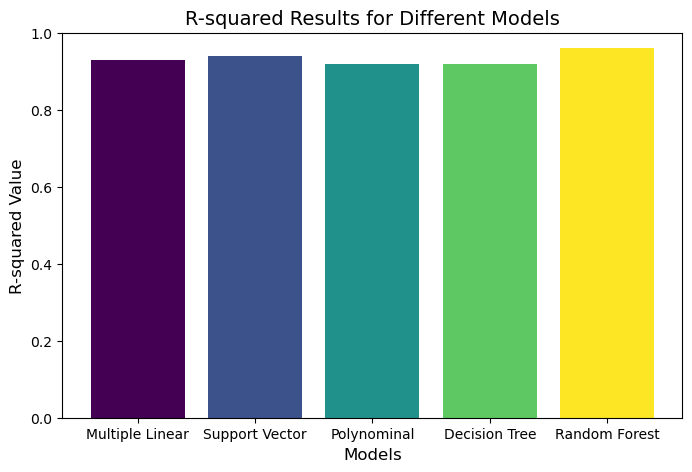

In [75]:
models = ['Multiple Linear', 'Support Vector', 'Polynominal', 'Decision Tree', 'Random Forest']
r_squared_values = [0.93, 0.94, 0.92, 0.92, 0.96]
colors = plt.cm.viridis(np.linspace(0, 1, len(models)))

# Create bar chart
plt.figure(figsize=(8, 5))
plt.bar(models, r_squared_values, color=colors)
plt.title('R-squared Results for Different Models', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('R-squared Value', fontsize=12)
plt.ylim(0, 1) 
plt.show()